# Recreation of adenine riboswitch DANCE analysis

Here I recreate the visualization done in Figure 2C of [this paper](https://doi.org/10.1016/j.molcel.2022.02.009).

In short, DMS-MaP was performed on the *V. ful* adenine riboswitch IVT construct in an absence of adenine ligand. DANCE-MaP analysis recapitulates the known states and populations of this riboswitch and provides direct evidence of the known secondary and tertiary interactions. This data is then used to accurately model each state of the ensemble.

To create the data files used here:

1) DMS-MaP was performed on the adenine riboswitch construct.
2) Illumina sequencing reads were given to ShapeMapper2.
3) ShapeMapper2 `parsed.mut` files were given to DanceMapper and foldClusters.

## Import RNAvigate

In [1]:
import rnavigate as MaP

## Load data

DanceMapper outputs files have a standard naming convention: a sample prefix followed by a suffix indicating the data type.
We provide RNAvigate with the sample prefix, and it will find all of the relevent data files.

Below, the default structure files are replaced with custom drawing files from StructureEditor. In addition,
the Translation ON state has a crystal structure and below this PDB structure file is added to the minor component of the DANCE-MaP model.

In [2]:
sample = MaP.Sample(sample="V.vul adeRS", dance_prefix="wt_0_deep")
# replacing ct structure files with nsd structure files, which also contain drawing coordinates
sample.dance[0].data["ct"] = MaP.CT("ss", "wt_0_deep-0.nsd")
sample.dance[1].data["ct"] = MaP.CT("ss", "wt_0_deep-1.nsd")
# custom sample names are given to each of the two states.
sample.dance[0].sample = f"Translation OFF ({sample.dance_percents[0]}%)"
sample.dance[1].sample = f"Translation ON ({sample.dance_percents[1]}%)"
# the "Translation ON" crystal structure is associated with the 2nd dance component.
sample.dance[1].data["pdb"] = MaP.PDB("4tzx.pdb", chain="X")


## Make Arc plot for each DANCE component

c:\Users\psirving\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
c:\Users\psirving\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


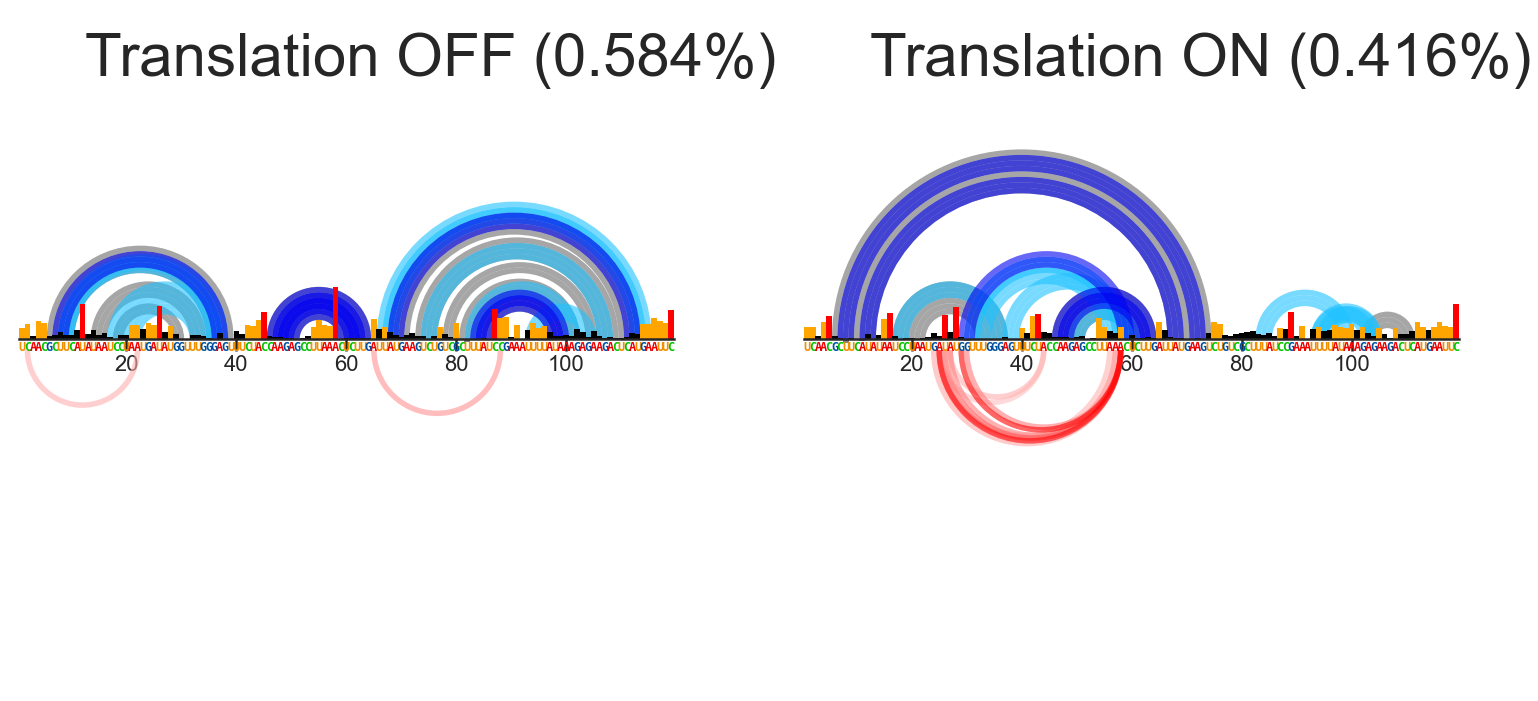

In [3]:
MaP.array_ap(sample.dance,                               # by default, the "ct" structure is plotted
             ij="rings", cdAbove=15, positive_only=True, # plot RINGs filtered by contact distance and positive correlation
             ij2="pairs", ij2_panel="top",               # plot PAIRs on the top half, overlaying the secondary structure.
             colorbar=False)                             # do not add color bar legends for RINGs and PAIRs data.


## Make secondary structure drawings for each component

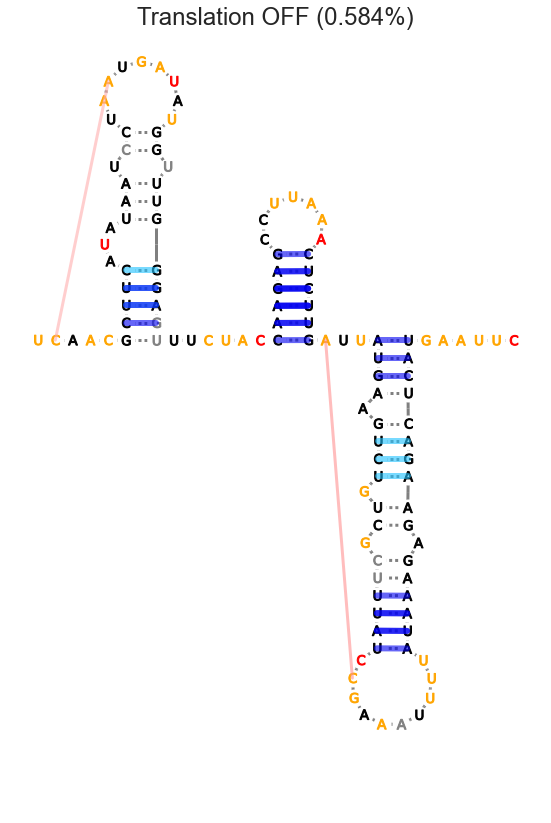

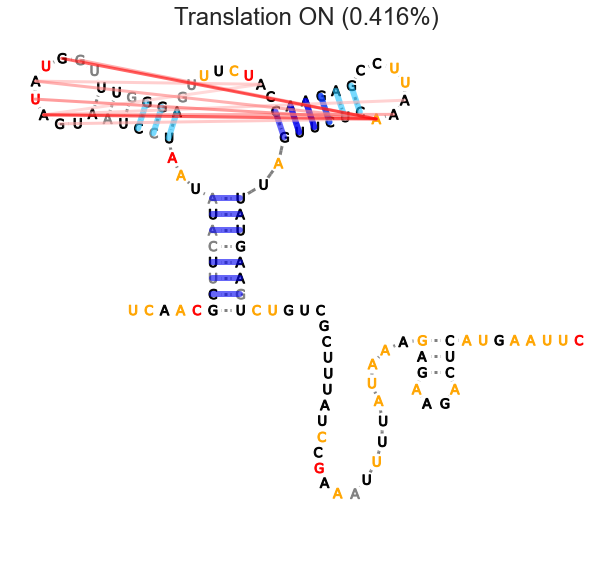

In [4]:
for component in sample.dance:
    component.make_ss(ss="ct",                                                      # This is the default behavior and is not needed.
                      ij="pairs", paired_only=True,                                 # Plot PAIRs filtered by if they reflect base-pairs in the ct structure
                      ij2="rings", ij2_filter={"cdAbove":15, "positive_only":True}, # Plot RINGs filtered by cd and positivity, same as above.
                      apply_color_to="sequence", colors="profile",                  # color the nucleotide letters by their reactivity profile values
                      colorbar=False);                                              # Don't show color bars for RINGs and PAIRs data

## Draw 3D structure with RINGs

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

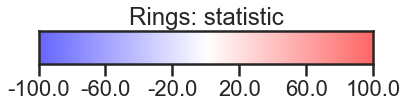

In [5]:
sample.dance[1].make_mol(ij="rings", cdAbove=15, positive_only=True, # plot RINGs data, same filtering as above
                         exclude_nts=[60],                           # exclude spurious correlation at nucleotide 60
                         nt_color="grey");                           # Color RNA cartoon in grey (semi-transparent by default)